# AIN429 - Data Mining Laboratory Project
## Instructor: Suat Özdemir
## Assistant: Ahmet Alkılınç
## Student Info: Can Ali Ateş
## Student ID: 2200765002

# Introduction to Problem
**A Fire Alarm System warns people when smoke, fire, carbon monoxide, or other fire-related or general notification emergencies are detected. In this project, I will develop a high-sensitive smoke analyzer system to identify the fire and then trigger the fire alarm system.**

# About Dataset
**The Dataset consists of 62630 time-series record with 15 feature.**
* **UTC: Time when experiment was performed**
* **Temperature[C]: Temperature of surroundings, measured in celcius**
* **Humidity[%]: Air humidity during the experiment**
* **TVOC[ppb]: Total Volatile Organic Compounds, measured in ppb (parts per billion)**
* **eCO2[ppm]: CO2 equivalent concentration, measured in ppm (parts per million)**
* **Raw H2: The amount of Raw Hydrogen [Raw Molecular Hydrogen; not compensated (Bias, Temperature etc.)] present in surroundings**
* **Raw Ethanol: The amount of Raw Ethanol present in surroundings**
* **Pressure[hPa]: Air pressure, Measured in hPa**
* **PM1.0: Paticulate matter of diameter less than 1.0 micrometer**
* **PM2.5: Paticulate matter of diameter less than 2.5 micrometer**
* **NC0.5: Concentration of particulate matter of diameter less than 0.5 micrometer**
* **NC1.0: Concentration of particulate matter of diameter less than 1.0 micrometer**
* **NC2.5: Concentration of particulate matter of diameter less than 2.5 micrometer**
* **CNT: Sample Count. Fire Alarm(Reality) If fire was present then value is 1 else it is 0**
* **Fire Alarm: 1 means Positive and 0 means Not Positive**

## Importing Libraries & Reading Dataset

In [ ]:
# Import Libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
# Read CSV File as Data Frame.
df = pd.read_csv('smoke_detection.csv')

# Display Shape Information of Data Frame.
print(f"Data Frame Shape: {df.shape}")

# Display the first 5 record of Data Frame.
display(df)

Data Frame Shape: (62630, 16)


,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


## Data Preprocessing & Analyze

In [ ]:
# 'Unnamed: 0' is an index column, so we will drop it.
df = df.drop("Unnamed: 0", axis = 1)

# UTC column is an timely data, so we will drop it.
df = df.drop("UTC", axis = 1)

# Display Shape Information of Data Frame.
print(f"Data Frame Shape: {df.shape}")

# Display the first 5 record of Data Frame.
display(df)

Data Frame Shape: (62630, 14)


,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


**Since 'Unnamed: 0' and 'UTC' features do not serve anything other than specifying index and time range, they are not important in model development, so it would be more logical to dimension reduction by reducing these features.**

In [ ]:
# Regulate Feature Names.
df.columns = ['Temperature', 
              'Humidity', 
              'TV0C', 
              'eCO2', 
              'Raw_H2', 
              'Raw_Ethanol', 
              'Pressure', 
              'PM1', 
              'PM2', 
              'NC0', 
              'NC1', 
              'NC2', 
              'CNT', 
              'Fire_Alarm'
]

**Corrections in property names are necessary for library commands to run without syntax errors. With the corrections made, property names are brought into a format suitable for python's naming convention.**

In [ ]:
# Check data types of features.
df.dtypes

Temperature    float64
Humidity       float64
TV0C             int64
eCO2             int64
Raw_H2           int64
Raw_Ethanol      int64
Pressure       float64
PM1            float64
PM2            float64
NC0            float64
NC1            float64
NC2            float64
CNT              int64
Fire_Alarm       int64
dtype: object

**The dataset doesn't contain any categorical or object columns, so we will work on numerical data. Based on first impression, we can use Logistic Regression because probably most of these features contain discrete numerical data so regression methods will not be as good as classification methods. The accuracy condition of Logistic Regression is linear separability, so I have to make sure of the linear separability of the classes before applying the Logistic Regression.**

In [ ]:
# Check NaN values.
df.isna().sum()

Temperature    0
Humidity       0
TV0C           0
eCO2           0
Raw_H2         0
Raw_Ethanol    0
Pressure       0
PM1            0
PM2            0
NC0            0
NC1            0
NC2            0
CNT            0
Fire_Alarm     0
dtype: int64

**The dataset doesn't contain any NaN value, because it is time-series data which is collected by a sensor second to second. I will not to do any operation for missing values.** 

In [ ]:
# Display the Summary Statistics of Data Frame. 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,62630.0,15.970424,14.359576,-22.010,10.99425,20.130,25.4095,59.930
Humidity,62630.0,48.539499,8.865367,10.740,47.53000,50.150,53.2400,75.200
TV0C,62630.0,1942.057528,7811.589055,0.000,130.00000,981.000,1189.0000,60000.000
eCO2,62630.0,670.021044,1905.885439,400.000,400.00000,400.000,438.0000,60000.000
Raw_H2,62630.0,12942.453936,272.464305,10668.000,12830.00000,12924.000,13109.0000,13803.000
Raw_Ethanol,62630.0,19754.257912,609.513156,15317.000,19435.00000,19501.000,20078.0000,21410.000
Pressure,62630.0,938.627649,1.331344,930.852,938.70000,938.816,939.4180,939.861
PM1,62630.0,100.594309,922.524245,0.000,1.28000,1.810,2.0900,14333.690
PM2,62630.0,184.467770,1976.305615,0.000,1.34000,1.880,2.1800,45432.260
NC0,62630.0,491.463608,4265.661251,0.000,8.82000,12.450,14.4200,61482.030


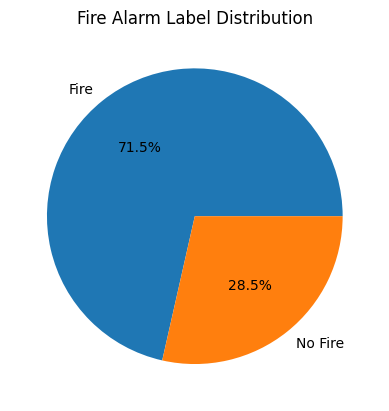

In [ ]:
# Plot Label Distribution with Pie Chart.
plt.pie(df['Fire_Alarm'].value_counts(),labels=['Fire','No Fire'],autopct='%1.1f%%')
plt.title('Fire Alarm Label Distribution')
plt.show()

**According to distribution of the labels, the labels are not uniformly distributed. Therefore, the models will learn a class more successful.**

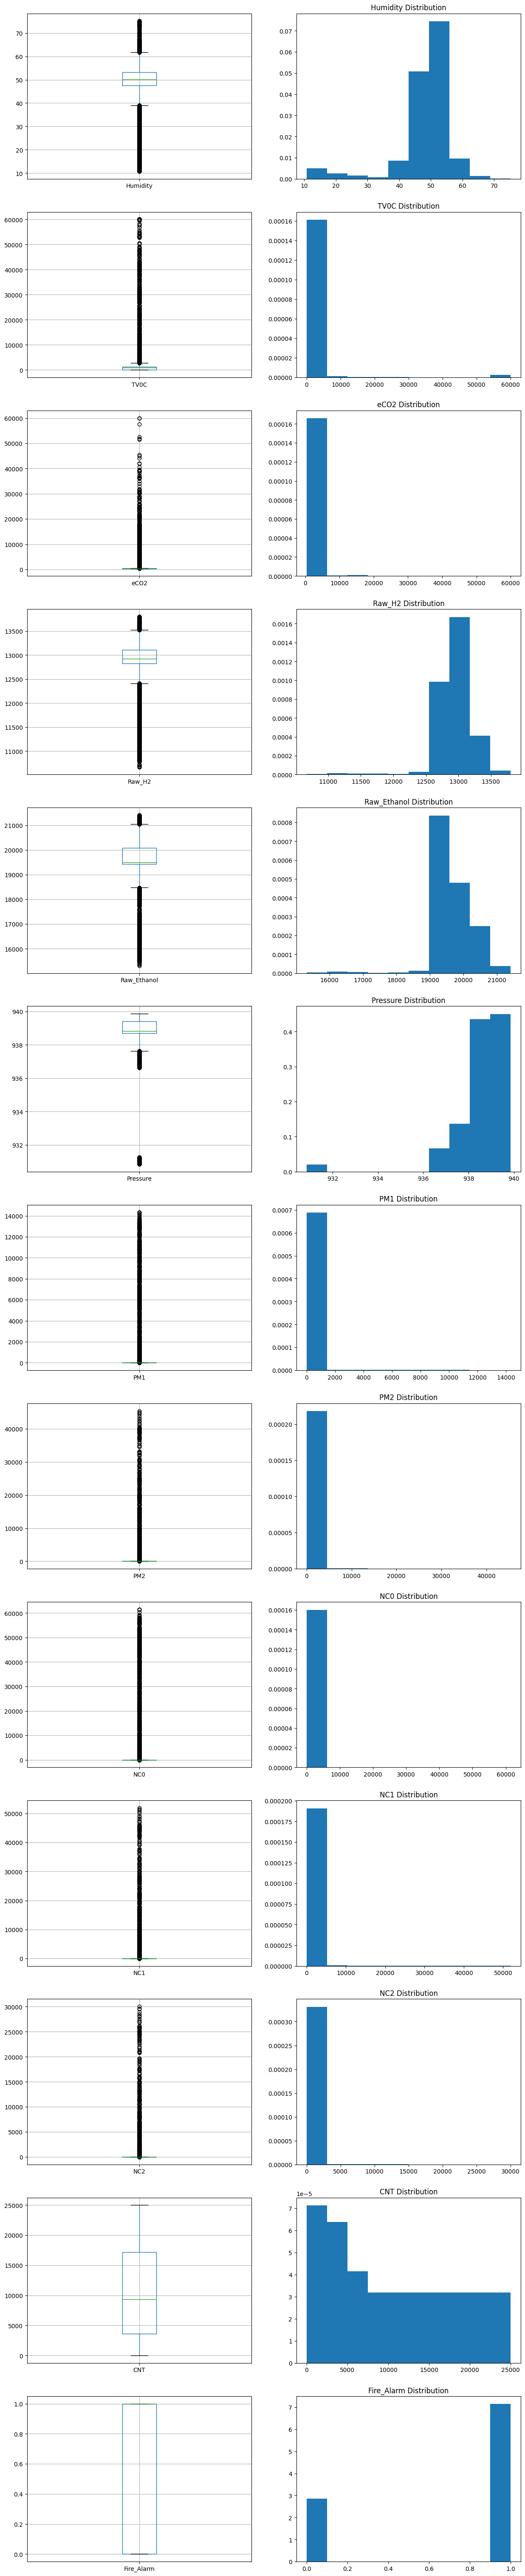

In [ ]:
# Create Boxplot and Histogram of each feature column to detect possible outliers.
plt.figure(figsize=(15, 90))
for index, column in enumerate(df.columns[1:]):
    plt.subplot(15, 2, 2*index + 1)
    df.boxplot([column])
    plt.subplot(15, 2, 2*index + 2)
    plt.hist(df[column], density=True)
    plt.title(f'{column} Distribution')
plt.show()

**The dataset is a time-series dataset, so when the boxplot and histograms of the dataset are investigated in detail the spreads and skewness of the features are continuous. Because of that reason, none of the features has an outlier. I will analyze all the features detailed.**

### Analysis of Temperature Distribution

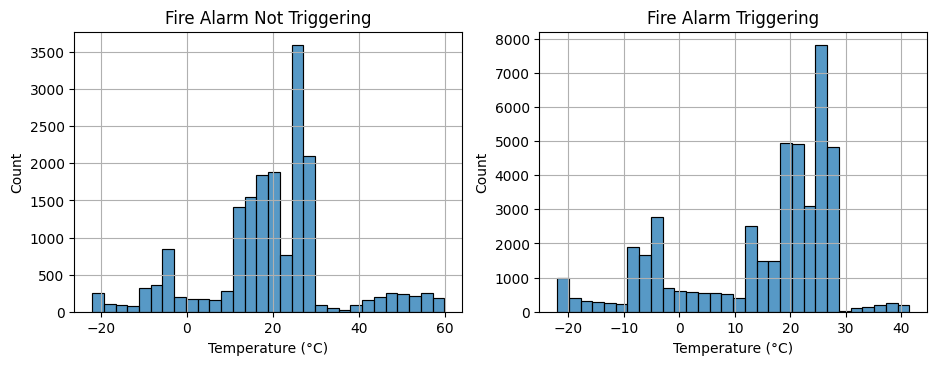

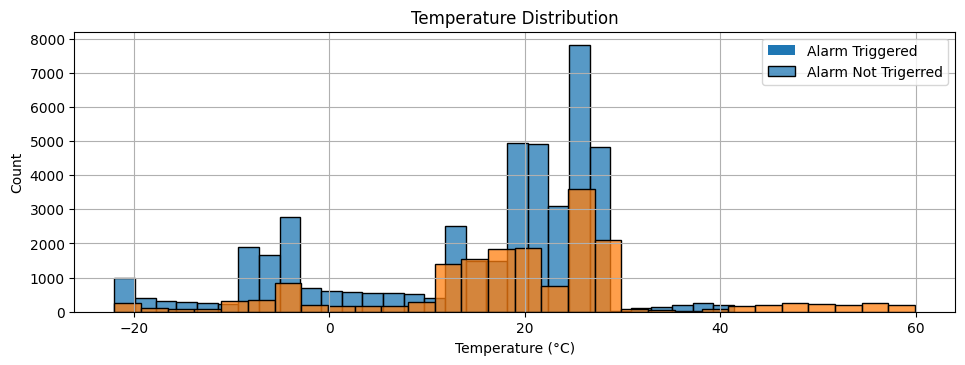

In [ ]:
# Arrange Figure Sizes of Subplots.
plt.figure(figsize=(11,8))

# Plot the Temperature and Fire Alarm Not Triggering Distribution.
plt.subplot(2,2,1)
sns.histplot(df.query('Fire_Alarm == 0')['Temperature'], bins = 30)
plt.title("Fire Alarm Not Triggering")
plt.xlabel("Temperature (°C)")
plt.ylabel("Count")
plt.grid(True)

# Plot the Temperature and Fire Alarm Triggering Distribution.
plt.subplot(2,2,2)
sns.histplot(df.query('Fire_Alarm == 1')['Temperature'], bins = 30)
plt.title("Fire Alarm Triggering")
plt.xlabel("Temperature (°C)")
plt.ylabel("Count")
plt.grid(True)

# Plot the Distribution of Temperature Based on Fire Alarm.
plt.figure(figsize=(25,8))
plt.subplot(2,2,3)
sns.histplot(df.query('Fire_Alarm == 1')['Temperature'], bins=30)
sns.histplot(df.query('Fire_Alarm == 0')['Temperature'], bins=30)
plt.legend(['Alarm Triggered', 'Alarm Not Trigerred'])
plt.title("Temperature Distribution")
plt.xlabel("Temperature (°C)")
plt.ylabel("Count")
plt.grid(True)

# Display the Plots.
plt.show()

* **Most of the temperatures that not trigger the fire alarm fall in between 12°C to 28°C.**
* **Most of the temperatures that trigger the fire alarm fall in between 18°C to 28°C.**
* **Temperature distribution is left skewed. Most of the temperatures fall in between 10°C to 30°C.**

### Analysis of Humidity Distribution

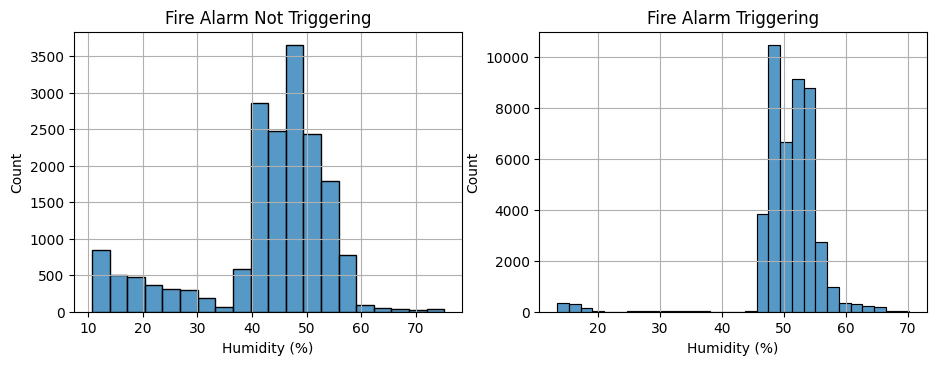

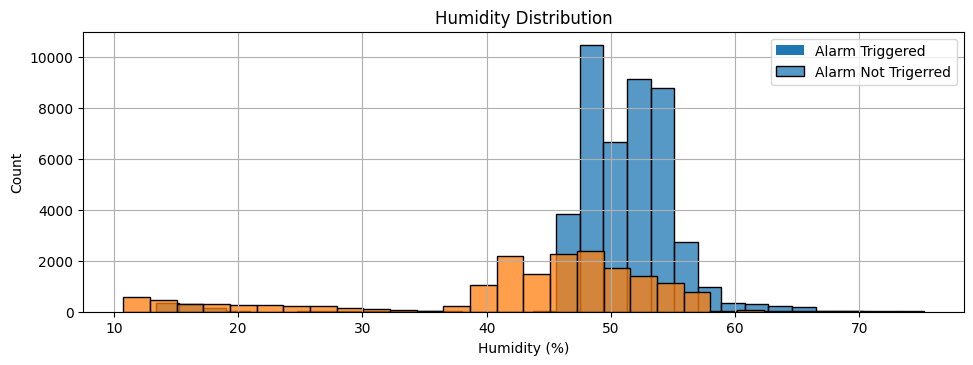

In [ ]:
# Arrange Figure Sizes of Subplots.
plt.figure(figsize=(11,8))

# Plot the Temperature and Fire Alarm Not Triggering Distribution.
plt.subplot(2,2,1)
sns.histplot(df.query('Fire_Alarm == 0')['Humidity'], bins = 20)
plt.title("Fire Alarm Not Triggering")
plt.xlabel("Humidity (%)")
plt.ylabel("Count")
plt.grid(True)

# Plot the Temperature and Fire Alarm Triggering Distribution.
plt.subplot(2,2,2)
sns.histplot(df.query('Fire_Alarm == 1')['Humidity'], bins = 30)
plt.title("Fire Alarm Triggering")
plt.xlabel("Humidity (%)")
plt.ylabel("Count")
plt.grid(True)

# Plot the Distribution of Temperature Based on Fire Alarm.
plt.figure(figsize=(25,8))
plt.subplot(2,2,3)
sns.histplot(df.query('Fire_Alarm == 1')['Humidity'], bins=30)
sns.histplot(df.query('Fire_Alarm == 0')['Humidity'], bins=30)
plt.legend(['Alarm Triggered', 'Alarm Not Trigerred'])
plt.title("Humidity Distribution")
plt.xlabel("Humidity (%)")
plt.ylabel("Count")
plt.grid(True)

# Display the Plots.
plt.show()

* **Most of the humidities that not trigger the fire alarm fall in between %38 to %57.**
* **Most of the humidities that trigger the fire alarm fall in between %46 to %56.**
* **Humidity distribution is left skewed. Most of the humidities fall in between %45 to %55.**

### Analysis of Total Volatile Organic Compounds Distribution

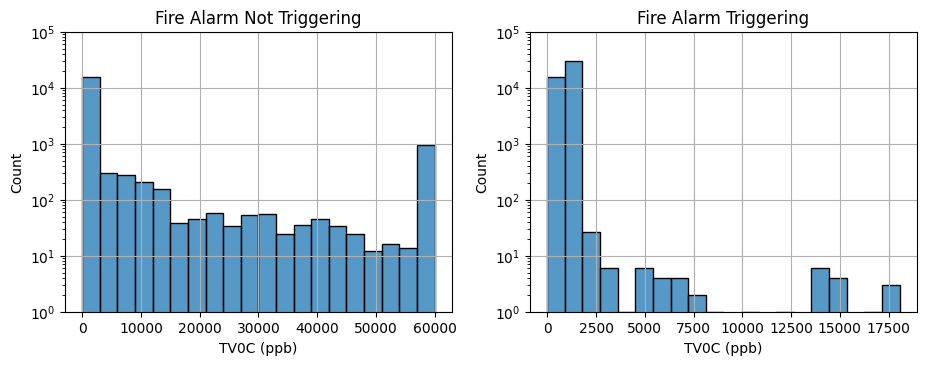

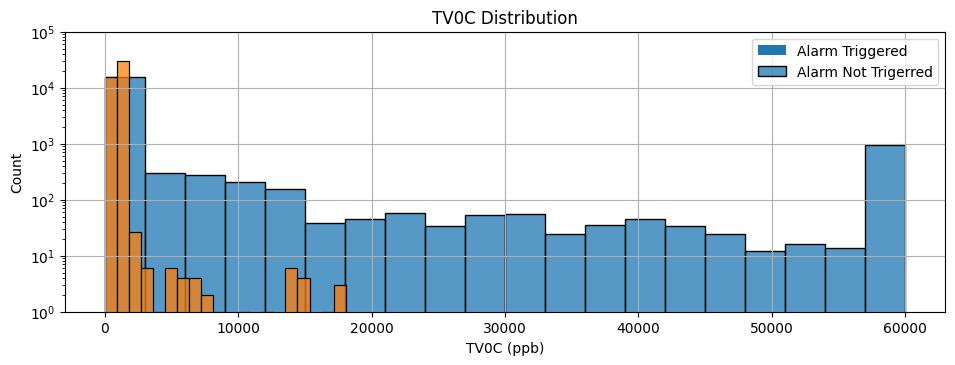

In [ ]:
# Arrange Figure Sizes of Subplots.
plt.figure(figsize=(11,8))

# Plot the Temperature and Fire Alarm Not Triggering Distribution.
plt.subplot(2,2,1)
sns.histplot(df.query('Fire_Alarm == 0')['TV0C'], bins = 20)
plt.title("Fire Alarm Not Triggering")
plt.xlabel("TV0C (ppb)")
plt.ylabel("Count")
plt.yscale('log')
plt.ylim(1, 100000)
plt.grid(True)

# Plot the Temperature and Fire Alarm Triggering Distribution.
plt.subplot(2,2,2)
sns.histplot(df.query('Fire_Alarm == 1')['TV0C'], bins = 20)
plt.title("Fire Alarm Triggering")
plt.xlabel("TV0C (ppb)")
plt.ylabel("Count")
plt.yscale('log')
plt.ylim(1, 100000)
plt.grid(True)

# Plot the Distribution of Temperature Based on Fire Alarm.
plt.figure(figsize=(25,8))
plt.subplot(2,2,3)
sns.histplot(df.query('Fire_Alarm == 0')['TV0C'], bins=20)
sns.histplot(df.query('Fire_Alarm == 1')['TV0C'], bins=20)
plt.legend(['Alarm Triggered', 'Alarm Not Trigerred'])
plt.title("TV0C Distribution")
plt.xlabel("TV0C (ppb)")
plt.ylabel("Count")
plt.yscale('log')
plt.ylim(1, 100000)
plt.grid(True)

# Display the Plots.
plt.show()

* **Most of the total volatile organic compounds that not trigger the fire alarm fall in between 0 ppb to 3000 ppb.**
* **Most of the total volatile organic compounds that trigger the fire alarm fall in between 0 ppb to 2300 ppb.**
* **Total volatile organic compounds distribution is right skewed. Most of the total volatile organic compounds fall in between 0 ppb to 3000 ppb.**

### Analysis of CO2 Equivalent Concentration Distribution

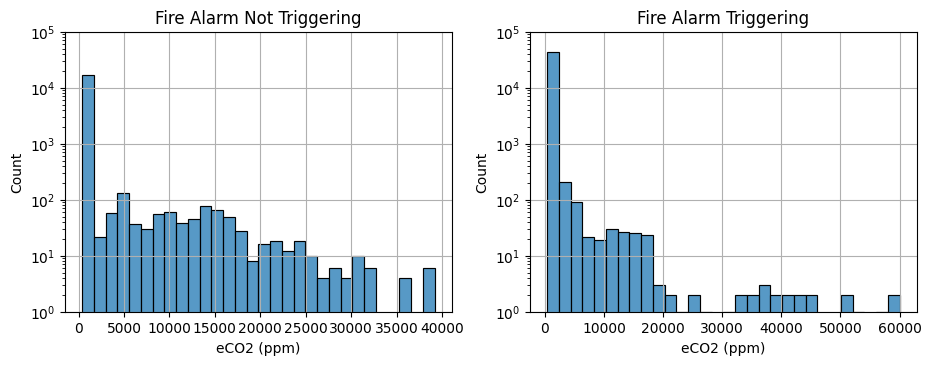

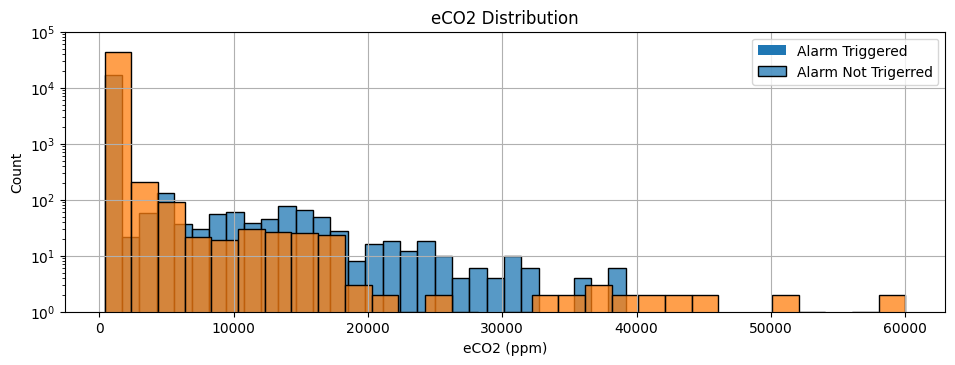

In [ ]:
# Arrange Figure Sizes of Subplots.
plt.figure(figsize=(11,8))

# Plot the Temperature and Fire Alarm Not Triggering Distribution.
plt.subplot(2,2,1)
sns.histplot(df.query('Fire_Alarm == 0')['eCO2'], bins = 30)
plt.title("Fire Alarm Not Triggering")
plt.xlabel("eCO2 (ppm)")
plt.ylabel("Count")
plt.yscale('log')
plt.ylim(1, 100000)
plt.grid(True)

# Plot the Temperature and Fire Alarm Triggering Distribution.
plt.subplot(2,2,2)
sns.histplot(df.query('Fire_Alarm == 1')['eCO2'], bins = 30)
plt.title("Fire Alarm Triggering")
plt.xlabel("eCO2 (ppm)")
plt.ylabel("Count")
plt.yscale('log')
plt.ylim(1, 100000)
plt.grid(True)

# Plot the Distribution of Temperature Based on Fire Alarm.
plt.figure(figsize=(25,8))
plt.subplot(2,2,3)
sns.histplot(df.query('Fire_Alarm == 0')['eCO2'], bins=30)
sns.histplot(df.query('Fire_Alarm == 1')['eCO2'], bins=30)

plt.legend(['Alarm Triggered', 'Alarm Not Trigerred'])
plt.title("eCO2 Distribution")
plt.xlabel("eCO2 (ppm)")
plt.ylabel("Count")
plt.yscale('log')
plt.ylim(1, 100000)
plt.grid(True)

# Display the Plots.
plt.show()

* **Most of the CO2 equivalent concentration values that not trigger the fire alarm fall in between 0 ppm to 1000 ppm.**
* **Most of the CO2 equivalent concentration values that trigger the fire alarm fall in between 0 ppm to 2500 ppm.**
* **CO2 equivalent concentration distribution is right skewed. Most of the CO2 equivalent concentration values fall in between 0 ppm to 1800 ppm.**

### Analysis of Raw Hydrogen Existance Distribution

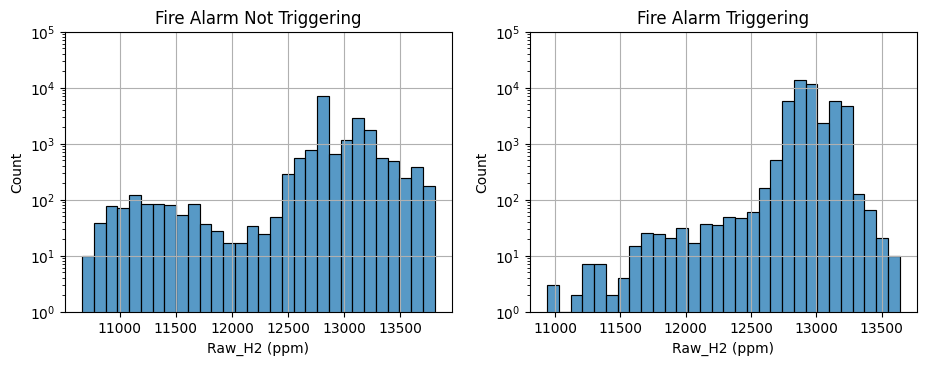

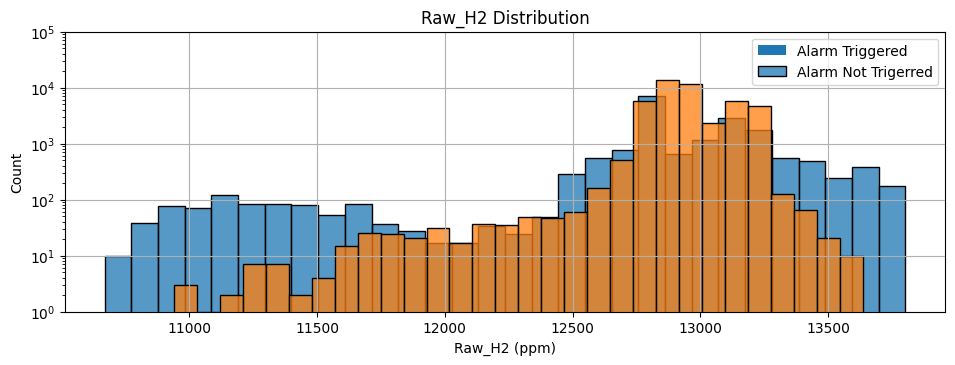

In [ ]:
# Arrange Figure Sizes of Subplots.
plt.figure(figsize=(11,8))

# Plot the Temperature and Fire Alarm Not Triggering Distribution.
plt.subplot(2,2,1)
sns.histplot(df.query('Fire_Alarm == 0')['Raw_H2'], bins = 30)
plt.title("Fire Alarm Not Triggering")
plt.xlabel("Raw_H2 (ppm)")
plt.ylabel("Count")
plt.yscale('log')
plt.ylim(1, 100000)
plt.grid(True)

# Plot the Temperature and Fire Alarm Triggering Distribution.
plt.subplot(2,2,2)
sns.histplot(df.query('Fire_Alarm == 1')['Raw_H2'], bins = 30)
plt.title("Fire Alarm Triggering")
plt.xlabel("Raw_H2 (ppm)")
plt.ylabel("Count")
plt.yscale('log')
plt.ylim(1, 100000)
plt.grid(True)

# Plot the Distribution of Temperature Based on Fire Alarm.
plt.figure(figsize=(25,8))
plt.subplot(2,2,3)
sns.histplot(df.query('Fire_Alarm == 0')['Raw_H2'], bins=30)
sns.histplot(df.query('Fire_Alarm == 1')['Raw_H2'], bins=30)

plt.legend(['Alarm Triggered', 'Alarm Not Trigerred'])
plt.title("Raw_H2 Distribution")
plt.xlabel("Raw_H2 (ppm)")
plt.ylabel("Count")
plt.yscale('log')
plt.ylim(1, 100000)
plt.grid(True)

# Display the Plots.
plt.show()

* **Most of the raw hydrogen existance values that not trigger the fire alarm fall in between 12500 ppm to 13500 ppm.**
* **Most of the raw hydrogen existance values that trigger the fire alarm fall in between 12750 ppm to 13400 ppm.**
* **Raw hydrogen existance distribution is left skewed. Most of the raw hydrogen existance values fall in between 12500 ppm to 13500 ppm.**

### Analysis of Raw Ethanol Existance Distribution

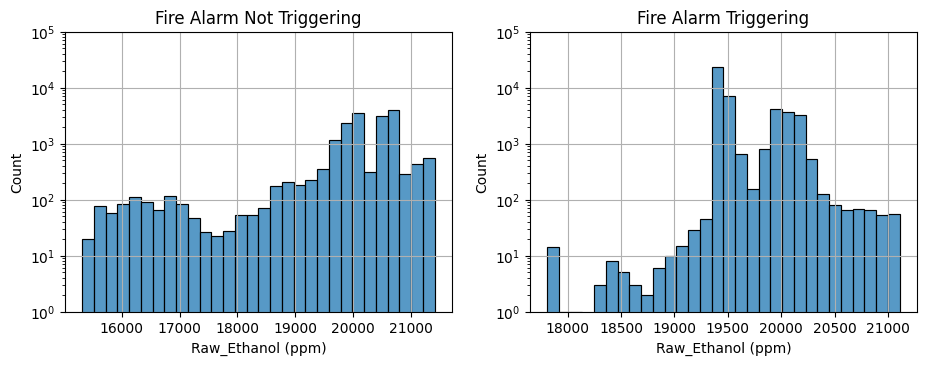

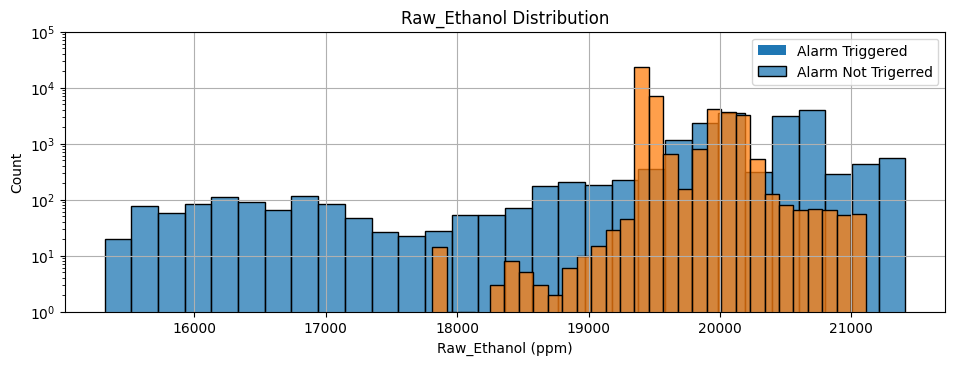

In [ ]:
# Arrange Figure Sizes of Subplots.
plt.figure(figsize=(11,8))

# Plot the Temperature and Fire Alarm Not Triggering Distribution.
plt.subplot(2,2,1)
sns.histplot(df.query('Fire_Alarm == 0')['Raw_Ethanol'], bins = 30)
plt.title("Fire Alarm Not Triggering")
plt.xlabel("Raw_Ethanol (ppm)")
plt.ylabel("Count")
plt.yscale('log')
plt.ylim(1, 100000)
plt.grid(True)

# Plot the Temperature and Fire Alarm Triggering Distribution.
plt.subplot(2,2,2)
sns.histplot(df.query('Fire_Alarm == 1')['Raw_Ethanol'], bins = 30)
plt.title("Fire Alarm Triggering")
plt.xlabel("Raw_Ethanol (ppm)")
plt.ylabel("Count")
plt.yscale('log')
plt.ylim(1, 100000)
plt.grid(True)

# Plot the Distribution of Temperature Based on Fire Alarm.
plt.figure(figsize=(25,8))
plt.subplot(2,2,3)
sns.histplot(df.query('Fire_Alarm == 0')['Raw_Ethanol'], bins=30)
sns.histplot(df.query('Fire_Alarm == 1')['Raw_Ethanol'], bins=30)

plt.legend(['Alarm Triggered', 'Alarm Not Trigerred'])
plt.title("Raw_Ethanol Distribution")
plt.xlabel("Raw_Ethanol (ppm)")
plt.ylabel("Count")
plt.yscale('log')
plt.ylim(1, 100000)
plt.grid(True)

# Display the Plots.
plt.show()

* **Most of the raw ethanol existance values that not trigger the fire alarm fall in between 19600 ppm to 21100 ppm.**
* **Most of the raw ethanol existance values that trigger the fire alarm fall in between 19250 ppm to 20300 ppm.**
* **Raw ethanol existance distribution is left skewed. Most of the raw ethanol existance values fall in between 19250 ppm to 20900 ppm.**

### Analysis of Air Pressure Distribution

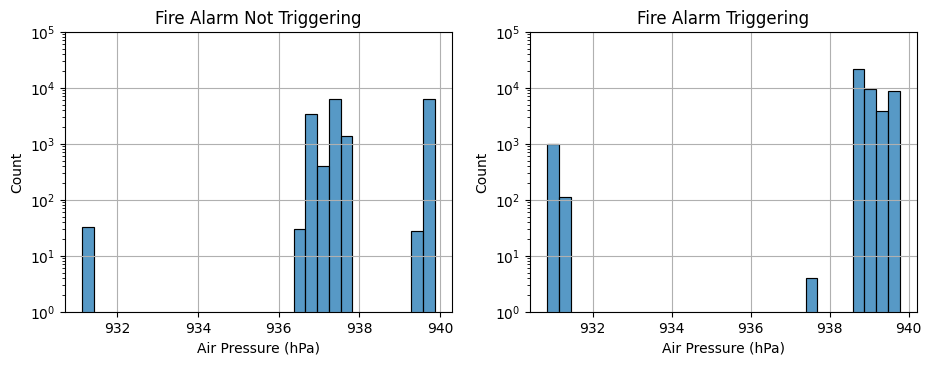

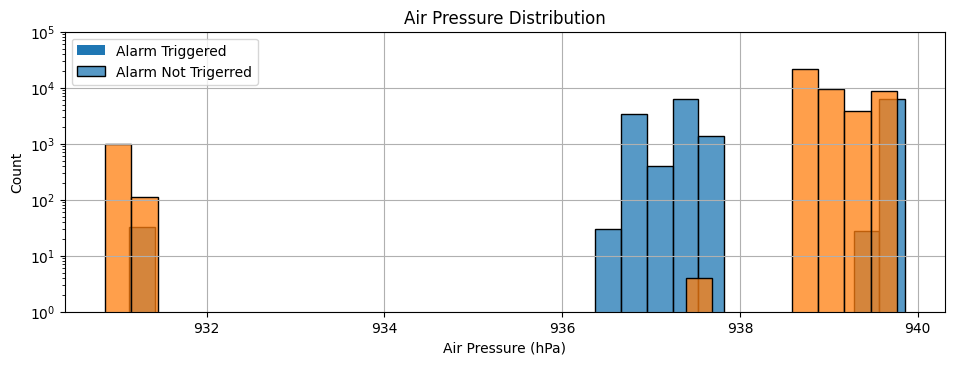

In [ ]:
# Arrange Figure Sizes of Subplots.
plt.figure(figsize=(11,8))

# Plot the Temperature and Fire Alarm Not Triggering Distribution.
plt.subplot(2,2,1)
sns.histplot(df.query('Fire_Alarm == 0')['Pressure'], bins = 30)
plt.title("Fire Alarm Not Triggering")
plt.xlabel("Air Pressure (hPa)")
plt.ylabel("Count")
plt.yscale('log')
plt.ylim(1, 100000)
plt.grid(True)

# Plot the Temperature and Fire Alarm Triggering Distribution.
plt.subplot(2,2,2)
sns.histplot(df.query('Fire_Alarm == 1')['Pressure'], bins = 30)
plt.title("Fire Alarm Triggering")
plt.xlabel("Air Pressure (hPa)")
plt.ylabel("Count")
plt.yscale('log')
plt.ylim(1, 100000)
plt.grid(True)

# Plot the Distribution of Temperature Based on Fire Alarm.
plt.figure(figsize=(25,8))
plt.subplot(2,2,3)
sns.histplot(df.query('Fire_Alarm == 0')['Pressure'], bins=30)
sns.histplot(df.query('Fire_Alarm == 1')['Pressure'], bins=30)

plt.legend(['Alarm Triggered', 'Alarm Not Trigerred'])
plt.title("Air Pressure Distribution")
plt.xlabel("Air Pressure (hPa)")
plt.ylabel("Count")
plt.yscale('log')
plt.ylim(1, 100000)
plt.grid(True)

# Display the Plots.
plt.show()

* **Most of the air pressure values that not trigger the fire alarm fall in between 936.6hPa to 937.7hPa.**
* **Most of the air pressure values that trigger the fire alarm fall in between 938.7hPa to 939.9hPa.**
* **Air pressure distribution is left skewed. Most of the air pressure values fall in between 936.6hPa to 937.7hPa or 938.7hPa to 939.9hPa.**

### Analysis of Particulate Matter Distribution

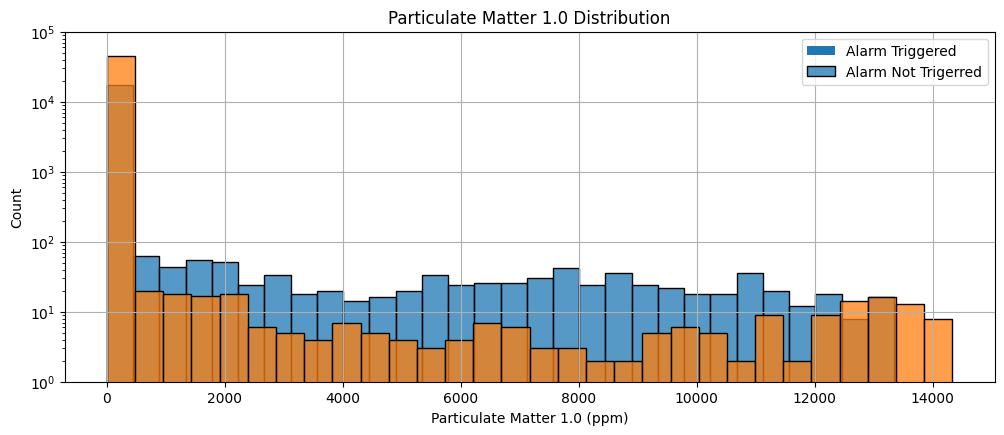

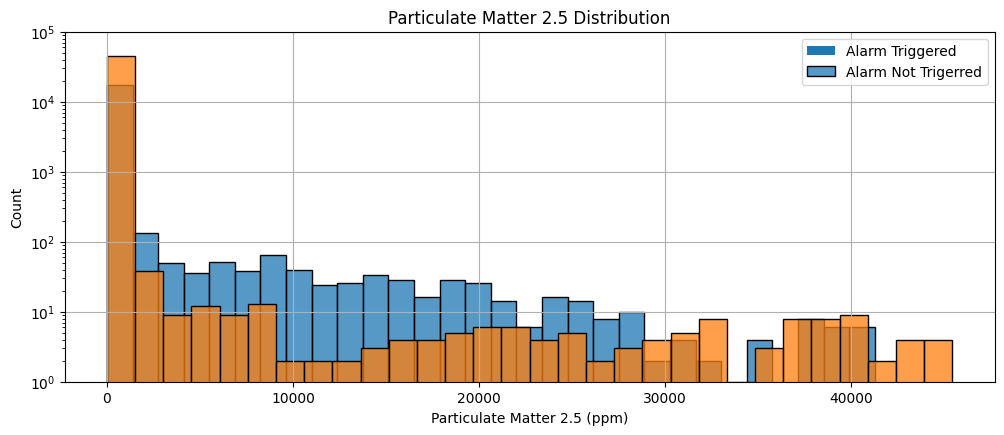

In [ ]:
# Plot the Distribution of Temperature Based on Fire Alarm.
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
sns.histplot(df.query('Fire_Alarm == 0')['PM1'], bins=30)
sns.histplot(df.query('Fire_Alarm == 1')['PM1'], bins=30)

plt.legend(['Alarm Triggered', 'Alarm Not Trigerred'])
plt.title("Particulate Matter 1.0 Distribution")
plt.xlabel("Particulate Matter 1.0 (ppm)")
plt.ylabel("Count")
plt.yscale('log')
plt.ylim(1, 100000)
plt.grid(True)

# Plot the Distribution of Temperature Based on Fire Alarm.
plt.figure(figsize=(12,10))
plt.subplot(2,1,2)
sns.histplot(df.query('Fire_Alarm == 0')['PM2'], bins=30)
sns.histplot(df.query('Fire_Alarm == 1')['PM2'], bins=30)

plt.legend(['Alarm Triggered', 'Alarm Not Trigerred'])
plt.title("Particulate Matter 2.5 Distribution")
plt.xlabel("Particulate Matter 2.5 (ppm)")
plt.ylabel("Count")
plt.yscale('log')
plt.ylim(1, 100000)
plt.grid(True)

# Display the Plots.
plt.show()

* **Most of the particulate matter 1.0 and 2.5 values fall in between either 0 ppm to 500ppm.**

* **Most of the particulate matter 1.0 and 2.5 values cause fire alarming fall in between 0 ppm to 500ppm.**

* **Most of the particulate matter 1.0 and 2.5 values do not cause fire alarming fall in between 0 ppm to 500ppm.**

### Analysis of Concentration Of Particulate Matter Distribution 

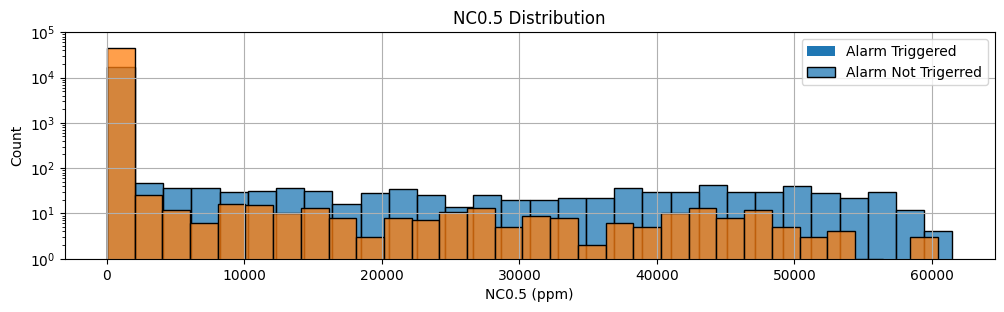

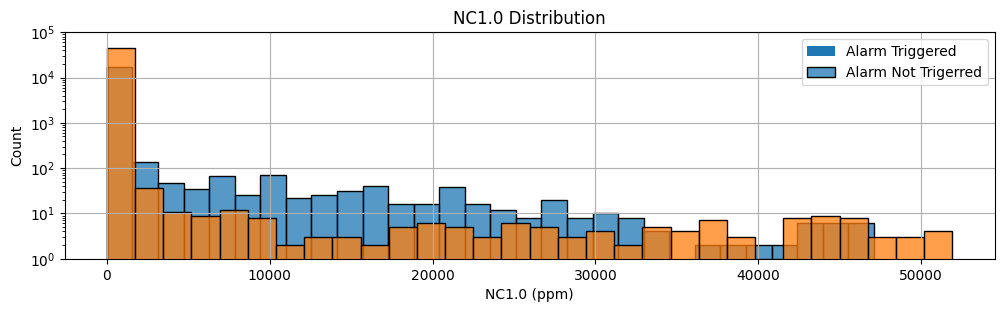

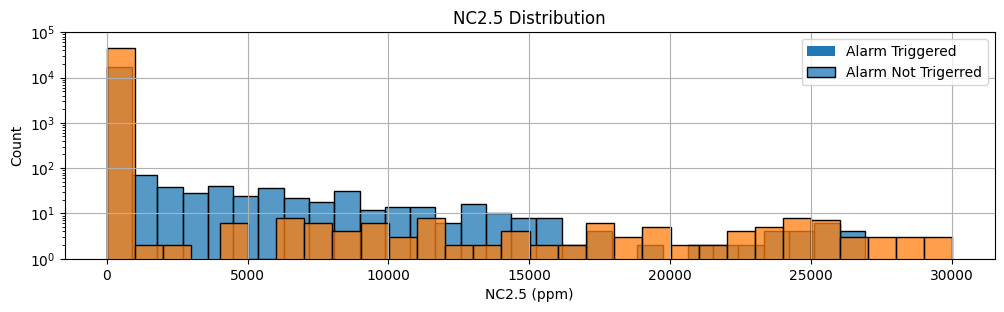

In [ ]:
# Plot the Distribution of Temperature Based on Fire Alarm.
plt.figure(figsize=(12,10))
plt.subplot(3,1,1)
sns.histplot(df.query('Fire_Alarm == 0')['NC0'], bins=30)
sns.histplot(df.query('Fire_Alarm == 1')['NC0'], bins=30)

plt.legend(['Alarm Triggered', 'Alarm Not Trigerred'])
plt.title("NC0.5 Distribution")
plt.xlabel("NC0.5 (ppm)")
plt.ylabel("Count")
plt.yscale('log')
plt.ylim(1, 100000)
plt.grid(True)

# Plot the Distribution of Temperature Based on Fire Alarm.
plt.figure(figsize=(12,10))
plt.subplot(3,1,2)
sns.histplot(df.query('Fire_Alarm == 0')['NC1'], bins=30)
sns.histplot(df.query('Fire_Alarm == 1')['NC1'], bins=30)

plt.legend(['Alarm Triggered', 'Alarm Not Trigerred'])
plt.title("NC1.0 Distribution")
plt.xlabel("NC1.0 (ppm)")
plt.ylabel("Count")
plt.yscale('log')
plt.ylim(1, 100000)
plt.grid(True)

# Plot the Distribution of Temperature Based on Fire Alarm.
plt.figure(figsize=(12,10))
plt.subplot(3,1,3)
sns.histplot(df.query('Fire_Alarm == 0')['NC2'], bins=30)
sns.histplot(df.query('Fire_Alarm == 1')['NC2'], bins=30)

plt.legend(['Alarm Triggered', 'Alarm Not Trigerred'])
plt.title("NC2.5 Distribution")
plt.xlabel("NC2.5 (ppm)")
plt.ylabel("Count")
plt.yscale('log')
plt.ylim(1, 100000)
plt.grid(True)

# Display the Plots.
plt.show()

* **Most of the concentration of particulate matter 0.5 values fall in between either 0ppm to 2000ppm, for particulate matter 1.0 it is 0ppm to 2500ppm and for particulate matter 2.5 it is 0 to 1000ppm.**

* **Most of the particulate matter 0.5 values cause fire alarming fall in between 0ppm to 2000ppm, for particulate matter 1.0 it is 0ppm to 2500ppm and for particulate matter 2.5 it is 0.035ppm to 0.060ppm.**

* **Most of the particulate matter 0.5 values do not cause fire alarming fall in between 0ppm to 2000ppm, for particulate matter 1.0 it is 0ppm to 2500ppm and for particulate matter 2.5 it is 0 to 1000ppm.**

## Correlation Analysis

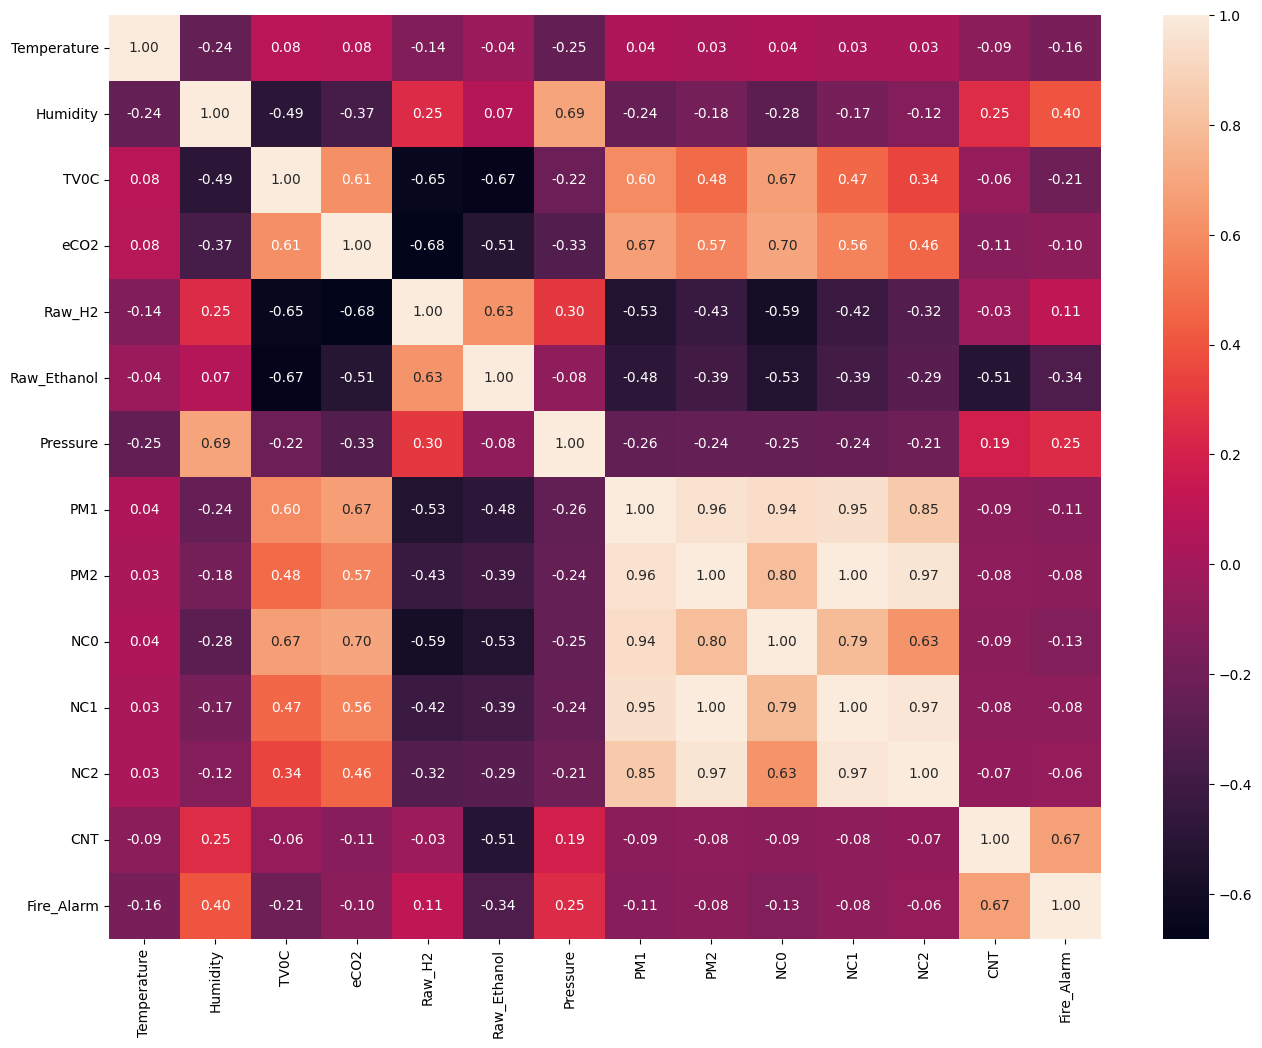

In [ ]:
# Plot Correlation Heatmap to Observe Features Relationships.
plt.figure(figsize = (16,12))
sns.heatmap(df.corr(), annot=True, fmt = '.2f')
plt.show()

* **As expected; the PM1, PM2, NC0, NC1 and NC2 features are highly correlated with each other because they are depending on the same observation as a domain knowledge.**

* **TV0C an eCO2 features are correlated with the PM1, PM2, NC0, NC1 and NC2 featues.**

* **Other features are mostly uncorrelated.**

* **Fire_Alarm label is slightly correlated with CNT, the other features are not correlated. So, all of the features can use in the classification.**

# Classification Models

**Labels of the dataset is discrete and binary categorical values, so I will try differen binary classification algorithms and compare them.**

In [ ]:
# Features
X = df.iloc[:, :-1]

# Class labels
y = df.iloc[:, -1]   

**I splitted the dataset into features and label.**

In [ ]:
# Normalize the data frame values.
scaler = MinMaxScaler()
normalized_df = scaler.fit_transform(X)
df = pd.DataFrame(normalized_df, columns = df.columns[:-1])
 
# Display the shape of the data frame.
print(f'Data Frame Shape: {df.shape}\n')

# Display first 5 record of the data frame.
df.head()

Data Frame Shape: (62630, 13)



,Temperature,Humidity,TV0C,eCO2,Raw_H2,Raw_Ethanol,Pressure,PM1,PM2,NC0,NC1,NC2,CNT
0,0.512692,0.723239,0.0,0.0,0.522488,0.525685,0.986014,0.0,0.0,0.0,0.0,0.0,0.00000
1,0.512875,0.712535,0.0,0.0,0.534928,0.547185,0.987013,0.0,0.0,0.0,0.0,0.0,0.00004
2,0.513046,0.701520,0.0,0.0,0.544179,0.565731,0.986347,0.0,0.0,0.0,0.0,0.0,0.00008
3,0.513229,0.690971,0.0,0.0,0.549282,0.579682,0.986125,0.0,0.0,0.0,0.0,0.0,0.00012
4,0.513412,0.681818,0.0,0.0,0.553429,0.591498,0.987013,0.0,0.0,0.0,0.0,0.0,0.00016


**I normalized all the columns into 0-1 range, because normalization is used to eliminate redundant data and ensures that good-quality classification.**

In [ ]:
# Train - Test split 
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.30, shuffle = True, random_state = 42)

In [ ]:
X_train

,Temperature,Humidity,TV0C,eCO2,Raw_H2,Raw_Ethanol,Pressure,PM1,PM2,NC0,NC1,NC2,CNT
50246,0.653283,0.304375,0.010883,0.013087,0.770973,0.661086,0.025419,0.028173,0.009240,0.045195,0.008354,3.339723e-04,0.010323
51202,0.604101,0.499069,0.001133,0.000872,0.698246,0.888068,0.744367,0.000163,0.000053,0.000261,0.000048,1.865023e-06,0.002401
48040,0.590310,0.616506,0.021933,0.000000,0.735885,0.670606,0.871795,0.000125,0.000041,0.000201,0.000037,1.432071e-06,0.922098
30520,0.532585,0.635433,0.000150,0.000000,0.831260,0.811259,0.987901,0.000176,0.000058,0.000282,0.000052,2.031543e-06,0.221102
19137,0.521687,0.668632,0.020200,0.000151,0.716746,0.674380,0.873127,0.000103,0.000034,0.000165,0.000030,1.198943e-06,0.765694
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62570,0.362143,0.076482,0.013017,0.000000,0.970973,0.848186,0.648019,0.000039,0.000013,0.000062,0.000012,4.662558e-07,0.227424
38158,0.599097,0.564071,0.018733,0.002349,0.692504,0.678155,0.891109,0.000114,0.000037,0.000184,0.000034,1.332159e-06,0.526707
860,0.597449,0.725411,0.000000,0.000000,0.745774,0.757427,0.988123,0.000026,0.000009,0.000042,0.000008,2.997359e-07,0.034410
15795,0.415023,0.576947,0.018800,0.000067,0.706858,0.678812,0.883006,0.000140,0.000046,0.000223,0.000041,1.598591e-06,0.631977


In [ ]:
y_train

50246    1
51202    0
48040    1
30520    1
19137    1
        ..
62570    0
38158    1
860      0
15795    1
56422    0
Name: Fire_Alarm, Length: 43841, dtype: int64

In [ ]:
X_test

,Temperature,Humidity,TV0C,eCO2,Raw_H2,Raw_Ethanol,Pressure,PM1,PM2,NC0,NC1,NC2,CNT
31120,0.528924,0.639001,0.002300,0.000000,0.804466,0.789595,0.981019,0.000067,0.000022,0.000107,0.000020,7.659916e-07,0.245109
49054,0.565170,0.667701,0.021617,0.000000,0.748644,0.670606,0.879343,0.000142,0.000046,0.000228,0.000042,1.631895e-06,0.962670
55910,0.797413,0.120850,0.000000,0.000000,0.941946,0.985557,0.661561,0.000081,0.000027,0.000130,0.000024,9.325115e-07,0.190773
33802,0.493654,0.714397,0.005967,0.000000,0.765869,0.753323,0.937174,0.000023,0.000007,0.000036,0.000007,2.664319e-07,0.352419
9683,0.215524,0.723084,0.013750,0.009681,0.627113,0.690300,0.919747,0.000180,0.000059,0.000289,0.000053,2.098151e-06,0.387428
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34204,0.521845,0.688024,0.006767,0.000453,0.720574,0.742820,0.927739,0.000098,0.000032,0.000158,0.000029,1.132335e-06,0.368503
48725,0.584208,0.572913,0.023750,0.000554,0.733014,0.664697,0.871018,0.000119,0.000039,0.000190,0.000035,1.365463e-06,0.949506
22248,0.070686,0.663978,0.023267,0.000151,0.731419,0.667323,0.869686,0.000135,0.000044,0.000216,0.000040,1.565287e-06,0.890169
4915,0.171540,0.682128,0.000533,0.000000,0.820734,0.798457,0.978577,0.000160,0.000053,0.000257,0.000048,1.865023e-06,0.196655


In [ ]:
y_test

31120    1
49054    1
55910    0
33802    1
9683     1
        ..
34204    1
48725    1
22248    1
4915     1
9600     1
Name: Fire_Alarm, Length: 18789, dtype: int64

**I splitted the dataset into features and label.**

## Logistic Regression Model

In [ ]:
# Create a Logistic Regression model.
logistic = LogisticRegression(max_iter = 1000)

# Train the model.
logistic.fit(X_train, y_train)

# Make Predictions.
logistic_pred = logistic.predict(X_test)

# Display the Accuracy.
print(f'Logistic Regression Accuracy: {logistic.score(X_test, y_test):.2f}')

Logistic Regression Accuracy: 0.96


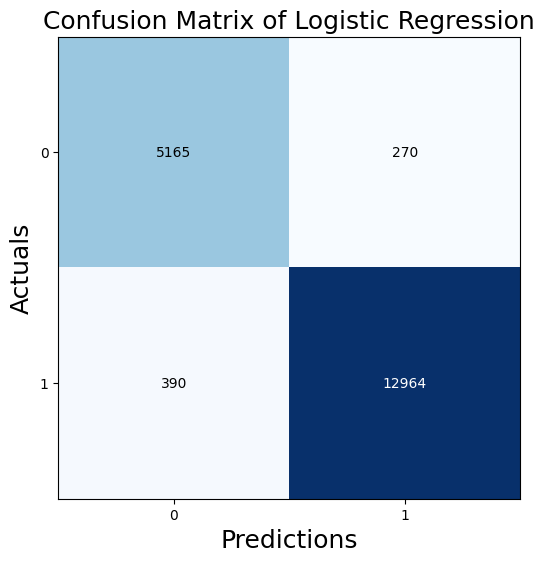

In [ ]:
# Plot Confusion Matrix of Logistic Regression
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, logistic_pred), figsize=(6, 6), cmap=plt.cm.Blues) 
plt.xlabel('Predictions', fontsize=18) 
plt.ylabel('Actuals', fontsize=18) 
plt.title('Confusion Matrix of Logistic Regression', fontsize=18) 
plt.show()

In [ ]:
# Display classification report of Logistic Regression.
print(classification_report(y_test, logistic_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      5435
           1       0.98      0.97      0.98     13354

    accuracy                           0.96     18789
   macro avg       0.95      0.96      0.96     18789
weighted avg       0.97      0.96      0.96     18789



## K-NN Model

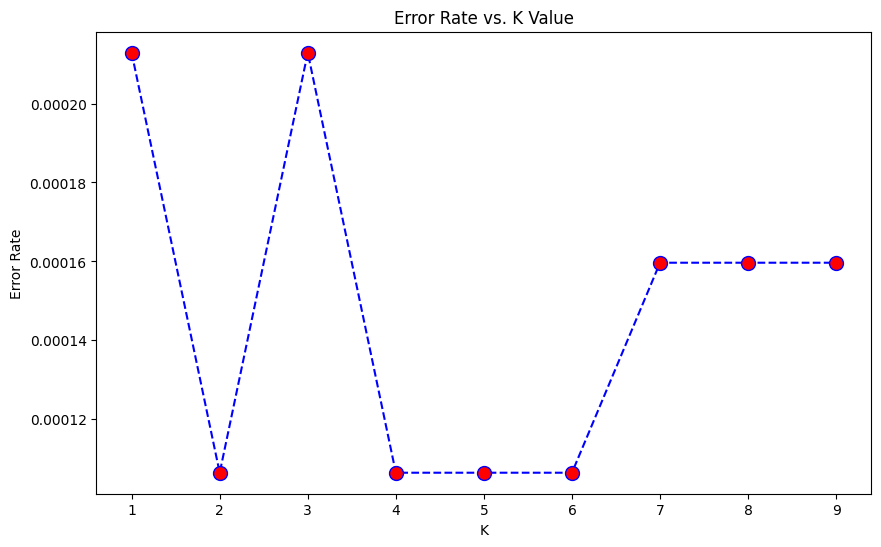

In [ ]:
# Calculate the error rate depend on k-value.
error_rate = []
for i in range(1, 10):
    optimal_knn = KNeighborsClassifier(n_neighbors=i)
    optimal_knn.fit(X_train,y_train)
    pred = optimal_knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

# Plot Error Rate - K value graph.
plt.figure(figsize=(10,6))
plt.plot(range(1, 10), error_rate, color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [ ]:
# Create a KNN model.
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model.
knn.fit(X_train,y_train)

# Make predictions.
knn_pred = knn.predict(X_test)

# Display the accuracy of the model on test set.
print(f'K-NN Accuracy: {knn.score(X_test, y_test):.2f}')

K-NN Accuracy: 1.00


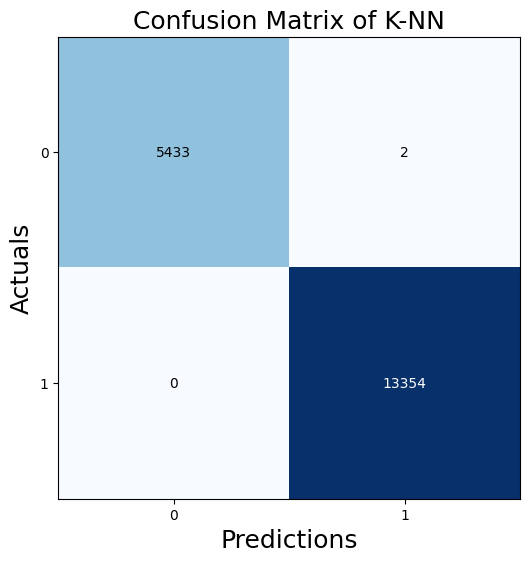

In [ ]:
# Plot Confusion Matrix of KNN.
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, knn_pred), figsize=(6, 6), cmap=plt.cm.Blues) 
plt.xlabel('Predictions', fontsize=18) 
plt.ylabel('Actuals', fontsize=18) 
plt.title('Confusion Matrix of K-NN', fontsize=18) 
plt.show()

In [ ]:
# Display classification report of KNN.
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5435
           1       1.00      1.00      1.00     13354

    accuracy                           1.00     18789
   macro avg       1.00      1.00      1.00     18789
weighted avg       1.00      1.00      1.00     18789



## Random Forest Model

In [ ]:
# Create a Random Forest Model
forest = RandomForestClassifier()

# Train the model
forest.fit(X_train, y_train)

# Make predictions with model
forest_preds = forest.predict(X_test)

# Display the accuracy of the model on test set.
print(f'Random Forest Accuracy: {forest.score(X_test, y_test):.2f}')

Random Forest Accuracy: 1.00


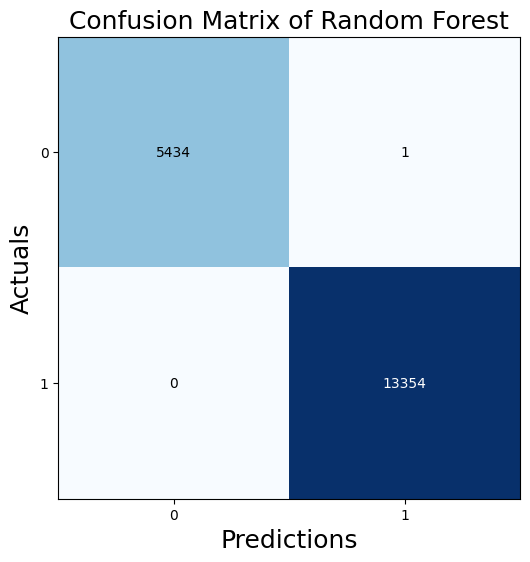

In [ ]:
# Plot Confusion Matrix of Random Forest.
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, forest_preds), figsize=(6, 6), cmap=plt.cm.Blues) 
plt.xlabel('Predictions', fontsize=18) 
plt.ylabel('Actuals', fontsize=18) 
plt.title('Confusion Matrix of Random Forest', fontsize=18) 
plt.show()

In [ ]:
# Display classification report of Random Forest.
print(classification_report(y_test, forest_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5435
           1       1.00      1.00      1.00     13354

    accuracy                           1.00     18789
   macro avg       1.00      1.00      1.00     18789
weighted avg       1.00      1.00      1.00     18789



## Support Vector Machines Model

In [ ]:
# Instantiate the Support Vector Classifier (SVC)
svc = SVC(C = 1.0, random_state=1, kernel='linear')
 
# Fit the model
svc.fit(X_train, y_train)

# Make the predictions
svc_pred = svc.predict(X_test)
 
# Measure the performance
print("SVM Accuracy: %.2f" %metrics.accuracy_score(y_test, svc_pred))

SVM Accuracy: 0.98


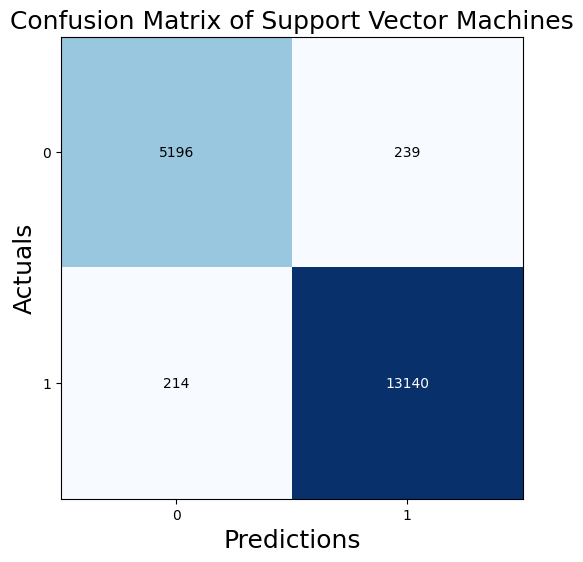

In [ ]:
# Plot Confusion Matrix of Support Vector Machines.
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, svc_pred), figsize=(6, 6), cmap=plt.cm.Blues) 
plt.xlabel('Predictions', fontsize=18) 
plt.ylabel('Actuals', fontsize=18) 
plt.title('Confusion Matrix of Support Vector Machines', fontsize=18) 
plt.show()

In [ ]:
# Display classification report of Support Vector Machines.
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      5435
           1       0.98      0.98      0.98     13354

    accuracy                           0.98     18789
   macro avg       0.97      0.97      0.97     18789
weighted avg       0.98      0.98      0.98     18789



## Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
# Make the predictions
gnb_pred = nb.predict(X_test)
print(f"Naive Bayes Accuracy: {nb.score(X_test, y_test):.2f}")

Naive Bayes Accuracy: 0.79


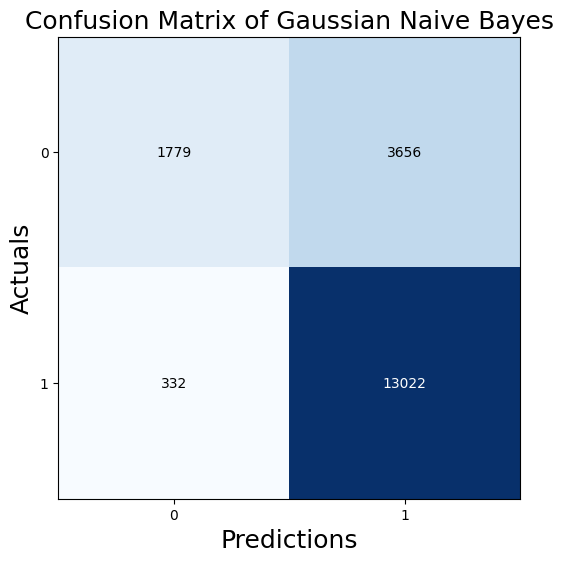

In [ ]:
# Plot Confusion Matrix of Gaussian Naive Bayes.
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, gnb_pred), figsize=(6, 6), cmap=plt.cm.Blues) 
plt.xlabel('Predictions', fontsize=18) 
plt.ylabel('Actuals', fontsize=18) 
plt.title('Confusion Matrix of Gaussian Naive Bayes', fontsize=18) 
plt.show()

In [ ]:
# Display classification report of Gaussian Naive Bayes.
print(classification_report(y_test, gnb_pred))

              precision    recall  f1-score   support

           0       0.84      0.33      0.47      5435
           1       0.78      0.98      0.87     13354

    accuracy                           0.79     18789
   macro avg       0.81      0.65      0.67     18789
weighted avg       0.80      0.79      0.75     18789



# Project Report

**In this project, I investigate the smoke detection from the time-series fire alarm systems dataset. The dataset contains 2 labels:**
* **0 (Fire Alarm Not Triggered)**
* **1 (Fire Alarm Triggered)**

**Based on this property, I decided to use binary classification so I implement classification models to observe and detect the smoke. The Project builded up 2 main section:**
* **Data Preprocessing and Analysis**
* **Classification Models**

## Section 1: Data Preprocessing and Analysis¶
**As a preliminary operation, I visualize the dataset and check the data types. The dataset contains 2 unnecessary columns that are 'Unnamed:0' which shows the record index and 'UTC' which shows the time, so I drop these columns. The dataset column names are not convenient for the python naming convention, so I updated these column names. The features contain just numerical columns which means I don't need to do any categorical data type preprocessing operation.**

**As main operations, I check the NaN values and outliers of the dataset. The records of the dataset were collected second by second, so doesn't contain any NaN values. I visualize the statistics of the columns, bar plots, histogram charts of features, and detailed histogram quantiles to check the outliers. Features that except 'Pressure' are spread and skewed as expected from the time-series data, so these columns do not contain certain outliers. The 'Pressure' column seems to contain outliers, but when I investigated it causes because the time zone of the day. In the evening to morning time zones the number of people in the environment decreases and depending on this situation the gas volume in the environment decreases then the pressure decreases, so gained from this domain knowledge the 'Pressure' feature has not to contain certain outliers.**

**As a final operation, I check the correlations of features with using heatmap. Observations over this correlation heatmap shows that, each feature is independent from the label of the dataset and the features which measures the particulate matter has a strong correlation among each other.**

## Section 2: Classification Models

**As a preliminary process, I split the dataset into features and label before applying train - test split with %70 and %30 respectively with shuffle. Then, I choose 5 different models to observe over the smoke detection problem. These models are:**
* **1. Logistic Regression (Linear & Eager Learner)**
* **2. K-Nearest Neighbors (Non-linear & Lazy Learner**
* **3. Random Forest (Non-linear & Eager Learner)**
* **4. Support Vector Machines (Linear & Eager Learner)**
* **5. Gaussian Naive Bayes (Non-linear & Eager Learner)**

#### Experimental Results
|Classification Model|Accuracy|Precision|Recall||
|--------------------|--------|---------|------||
|Logistic Regression|0.96|0.97|0.96|
|K-Nearest Neighbors|1.00|1.00|1.00|
|Random Forest|1.00|1.00|1.00|
|Support Vector Machines|0.98|0.98|0.98|
|Gaussian Naive Bayes|0.79|0.80|0.79|

#### Interpretation over Models

**Logistic Regression is a linear classifier that creates a linear boundary by applying a sigmoid function to linear regression. As an eager learner, it uses the train data to create a model by arranging the weights of the features. Depending on this feature weight initializations, model performance over the test set changes. In this project, as observed from the experimental results the weights are arranged conveniently and the model predicted approximately %96 of the test labels correctly.**

**K-NN is a lazy learner which means it holds all the training data so it can not use the time for training. By virtue of this, it needs to calculate a distance from each test point to these training points and then it has to create a non-linear decision boundary depending on the distance results. Therefore, the testing time complexity of the K-NN method is longer than other models which are eager learners. The testing results of the K-NN method show that the method is successful compared to Logistic Regression, Support Vector Machines, and Gaussian Naive Bayes. The reason for this situation comes from the time-series dataset property which means the data is recorded second by second, so the smoke detected times consecutively occurs. This consecutiveness provides a smaller distance between similar labels. As a result of these smaller distances, the method can easily separate classes from each other.** 

**Random Forest is an eager learner that uses train dataset to create a random decision trees. Because of these random decision trees it creates a non-linear decision boundaries. Each test point splits in these trees and reaches the predicted result. Difference from the logistic regression, it can not learn weights and use graph architecture to hold these trees. The label is independent from the all features so, smoke can easily identify with these random tree structures. The experiment results supports this approach with giving %100 accuracy on the test set.**

**Support Vector Machines is an eager learner that uses train dataset to create model. This model can creates non-linear decision boundaries by applying kernel function but in this problem I don't need to apply kernel because when I tried the model with the test dataset, it predicted the approximately %98 of the labels truely. That result shows that, the dataset is linearly seperable. This prooved linearly seperability provides the better results in Random Forest as mentioned in the Random Forest interpretation.**

**Gaussian Naive Bayes assumes conditional independence between the features but as explained in the correlation heatmap the dataset features are not independent completely as expected from the real world. Therefore, Gaussian Naive Bayes works worse relative to other classification models which can't assume any dependency between features.**

## Conclusion
**In conclusion, I developed 5 different classification models for smoke detection. Gaussian Naive Bayes failed because of the conditional independence assumption. Logistic Regression is too simple for this problem because the dataset is too complex so, the smoke detection problem needs a more complex model. Support Vector Machine, Random Forest, and K-NN models are statistically successful models but the K-NN is not trustful for this problem because the dataset is time series so K-NN can fail easily for different datasets. Support Vector Machines can not convenient because of the dataset complexity because dataset contains too much feature to make decision.**

**The last and the most accurate model is the Random Forest. The Random Forest has just one disadvantage, this disadvantage is needing more capacity in memory because it holds random decision trees as graphs. On the other hand, it has more advantages in comparison to the other models. These advantages are handling too many features in a simple model, making more accurate predictions because of the uncorrelation between features, running efficiently on large datasets, having better accuracy than the others, and having a lower risk of overfitting.**

**As a result, Random Forest is the optimal classifier to smoke detection so I strongly suggest using it on Fire Alarm Systems.**